In [1]:
import yaml
from pathlib import Path
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
folds = 5
exp_dir = '/path/to/exp/dir'
base_config = f'{exp_dir}/base/config.yaml'

In [4]:
kept_phenos = {}

with open(base_config) as f:
    baseconfig = yaml.safe_load(f)

total_phenos = baseconfig["phenotypes"]

for fold in range(folds):
    
    with open(f"{exp_dir}/fold_{fold}/config.yaml") as f:
        foldconfig = yaml.safe_load(f)

    kept_phenos[fold] = list(foldconfig["training"]["phenotypes"].keys())


In [3]:
seed_gene_file = 'seed_genes.parquet'
with open(f'{exp_dir}/base/config.yaml') as f:
    config = yaml.safe_load(f)

#selection_list = list(config["phenotypes"].keys())
phenotypes = config["training"]["phenotypes"]
all_phenos = config["phenotypes"]

In [4]:
pheno_seed_genes = {}
for pheno in phenotypes:
    seed_gene_df = pd.read_parquet(f'{exp_dir}/base/cv_split0/deeprvat/{pheno}/deeprvat/{seed_gene_file}', engine="pyarrow")
    pheno_seed_genes[pheno] = len(seed_gene_df)

    del seed_gene_df

In [14]:
with open(f'{exp_dir}/held_out_phenos.yaml', "r") as f:
    held_out_phenos = yaml.safe_load(f)

In [15]:
held_out_phenos

{'set_0': ['Total_bilirubin',
  'Cholesterol_statin_corrected',
  'Mean_corpuscular_volume',
  'Neutrophill_count'],
 'set_1': ['Apolipoprotein_A', 'Urate', 'Platelet_crit', 'Calcium'],
 'set_2': ['HDL_cholesterol',
  'Platelet_count',
  'Lymphocyte_percentage',
  'Mean_reticulocyte_volume'],
 'set_3': ['Mean_platelet_thrombocyte_volume',
  'LDL_direct_statin_corrected',
  'Triglycerides',
  'Red_blood_cell_erythrocyte_count'],
 'set_4': ['Standing_height',
  'Platelet_distribution_width',
  'Apolipoprotein_B',
  'SHBG']}

In [61]:
pheno_seed_genes

{'Apolipoprotein_A': 10,
 'Apolipoprotein_B': 5,
 'Calcium': 3,
 'Cholesterol_statin_corrected': 10,
 'Red_blood_cell_erythrocyte_count': 3,
 'HDL_cholesterol': 13,
 'IGF_1': 3,
 'LDL_direct_statin_corrected': 9,
 'Lymphocyte_percentage': 5,
 'Mean_platelet_thrombocyte_volume': 13,
 'Mean_corpuscular_volume': 7,
 'Mean_reticulocyte_volume': 3,
 'Neutrophill_count': 4,
 'Platelet_count': 10,
 'Platelet_crit': 7,
 'Platelet_distribution_width': 8,
 'SHBG': 3,
 'Standing_height': 12,
 'Total_bilirubin': 14,
 'Triglycerides': 7,
 'Urate': 8}

In [73]:
df = pd.DataFrame([pheno_seed_genes])

In [54]:
folds = 5

In [74]:
for fold in range(folds):
    group_df = df.copy(deep=True)
    group_df[held_out_phenos[f"set_{fold}"]] = 0
    df.loc[len(df.index)] = group_df.iloc[0]

<Axes: >

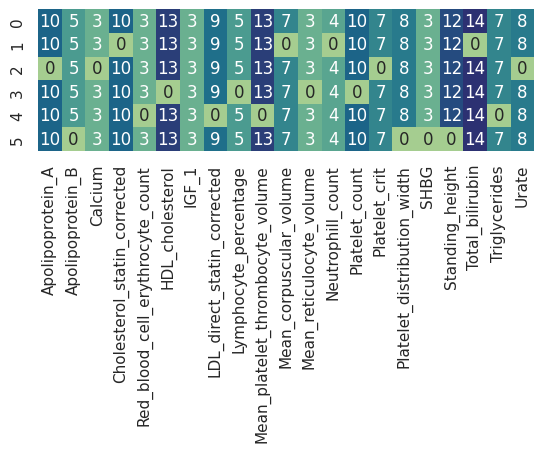

In [80]:
sns.heatmap(df, annot=True, cmap="crest", cbar=False, square=True,)